In [135]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
file_url = r'C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_3\3. Data-Cleaning-Challenge\iris-data.csv'
file_ori = pd.read_csv(file_url)
#We make a copy of the file and work on it
file = file_ori.copy()
file.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


First we have a quick preview at the data set with head() function.
Now let's look at the info of the file.

In [136]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


It's a 2240 rows x 29 columns file

In [137]:
## We look for non-numeric data
cat_df = file.select_dtypes(include=['object'])
cat_df.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [138]:
# We look for numeric data
num_df = file.select_dtypes(exclude=['object'])
num_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [139]:
def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")

In [140]:
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
class

Numeric columns:
sepal_length_cm
sepal_width_cm
petal_length_cm
petal_width_cm


In [141]:
## Check for duplicates
file.duplicated().any()

True

In [142]:
#Check for duplicates in ID column

In [143]:
file[file.duplicated()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [144]:
#If found, let's find the lines with duplicates

In [145]:
file.loc[file.duplicated(), :]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [146]:
file.drop_duplicates(inplace=True)

In [147]:
## Missing data check
file.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [148]:
#Check all the lines with missing data
file[file.isna().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [149]:
## Data inconsistency check
file.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,148.000000,148.000000,148.000000,143.000000
mean,5.648608,3.056757,3.764865,1.239860
std,1.320186,0.435056,1.763109,0.752287
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [150]:
#Check the mode values
#file.mode(self, axis=0, numeric_only=True, dropna=True)
file.mode(numeric_only=False,dropna=True)
#file.mode(numeric_only=False,dropna=True)['Income'][0]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.0,3.0,1.5,0.2,Iris-virginica


<Figure size 720x432 with 0 Axes>

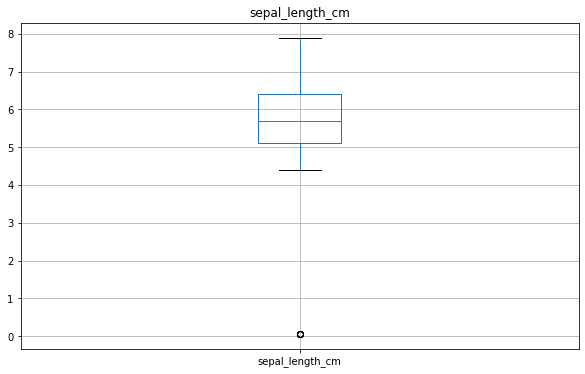

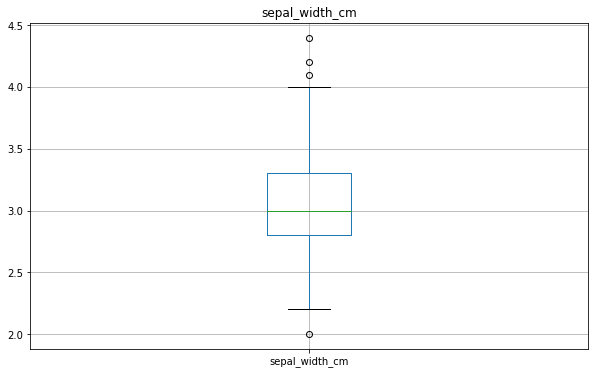

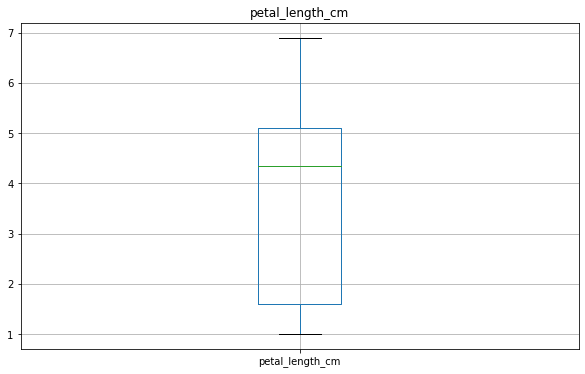

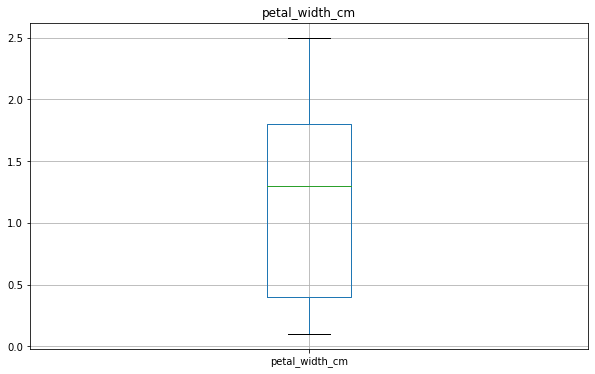

In [151]:
#Check Outliers

# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    file.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

<AxesSubplot:>

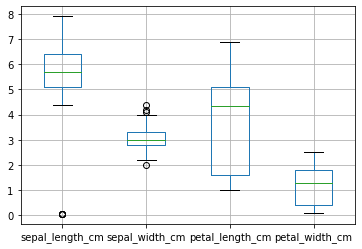

In [152]:
file.boxplot()

In [153]:
file[file['sepal_length_cm'] < 1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [154]:
file[file['sepal_length_cm'] < 1].mean()

sepal_length_cm    0.0588
sepal_width_cm     2.6600
petal_length_cm    4.1000
petal_width_cm     1.2600
dtype: float64

In [155]:
file.loc[file['sepal_length_cm'] < 1, 'sepal_length_cm'] = file['sepal_length_cm']*100

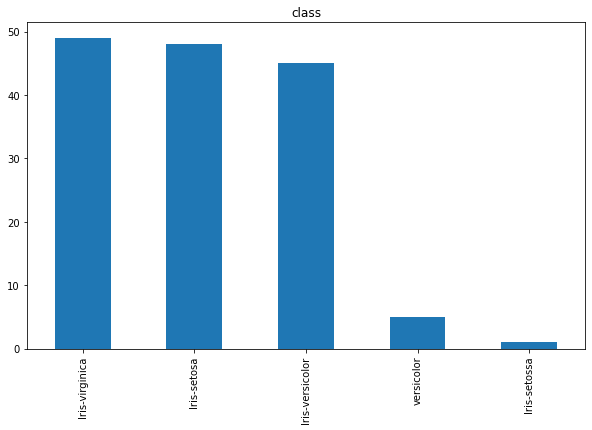

In [156]:
for col in cat_df:
    plt.figure(figsize=(10, 6))
    file[col].value_counts().plot.bar()
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [157]:
#Replace
file.loc[file['class'] == "versicolor", 'class'] = "Iris-versicolor"

In [158]:
file.loc[file['class'] == "Iris-setossa", 'class'] = "Iris-setosa"

In [159]:
cor=file.corr()
cor

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.103779,0.851030,0.797454
sepal_width_cm,-0.103779,1.000000,-0.418822,-0.346795
petal_length_cm,0.851030,-0.418822,1.000000,0.958337
petal_width_cm,0.797454,-0.346795,0.958337,1.000000


In [160]:
## Missing data check
file.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [162]:
round(file['petal_width_cm'][file['class'] == 'Iris-setosa'].mean(),2)

0.25

In [163]:
# imputing with mean
file['petal_width_cm'].fillna(round(file['petal_width_cm'][file['class'] == 'Iris-setosa'].mean(),2), inplace=True)

In [182]:
#Check if NA values left
file.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
class_enc          0
dtype: int64

In [165]:
#Check all the lines with missing data
file[file.isna().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [166]:
file

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Figure size 720x432 with 0 Axes>

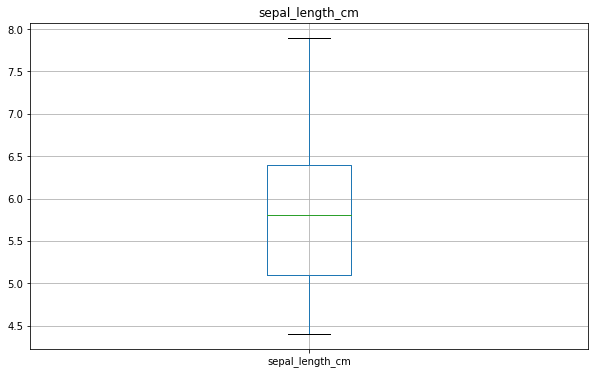

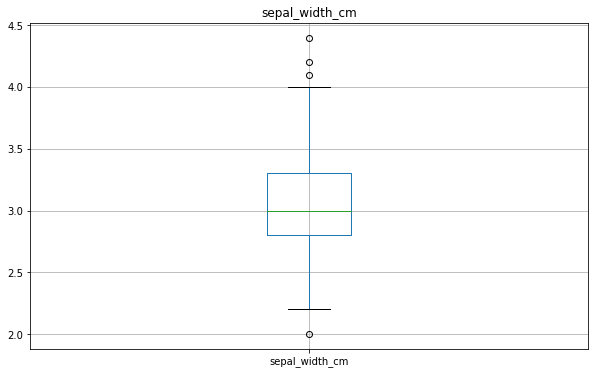

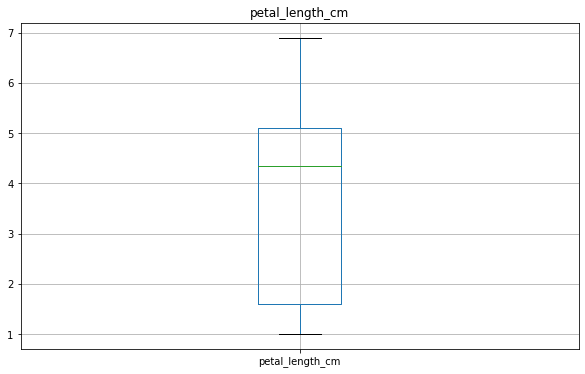

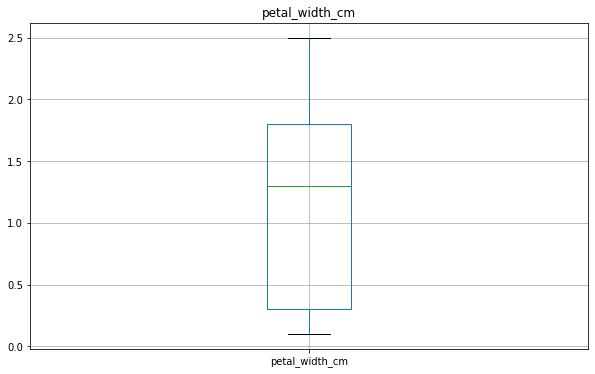

In [167]:
#Check Outliers - once cleaned

# Plot the variables (loop for plot variables) for num values
# We look for numeric data
num_df = file.select_dtypes(exclude=['object'])
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    file.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'2.png',bbox_inches='tight')

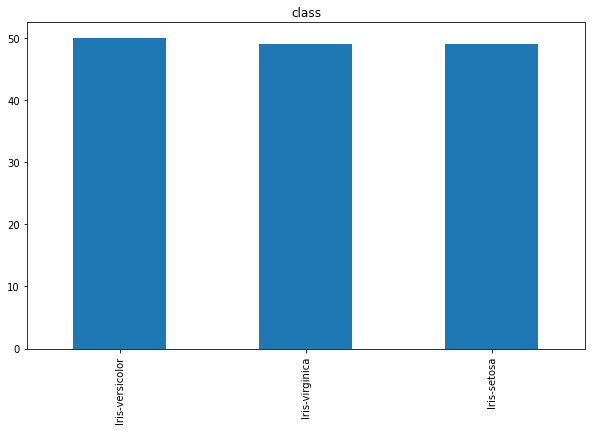

In [168]:
## We look for non-numeric data
cat_df = file.select_dtypes(include=['object'])
for col in cat_df:
    plt.figure(figsize=(10, 6))
    file[col].value_counts().plot.bar()
    plt.title(col)
    plt.savefig(col+r'2.png',bbox_inches='tight')

## Encoding

In [169]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#Encode Education
file["class_enc"] = label.fit_transform(file["class"])

In [170]:
##Exporting File after encoding
file.to_csv(r"C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_3\3. Data-Cleaning-Challenge\iris-data_clean_encoded.csv",index = False)

In [171]:
file.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,class_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# Plot

In [176]:
import seaborn as sns

<AxesSubplot:>

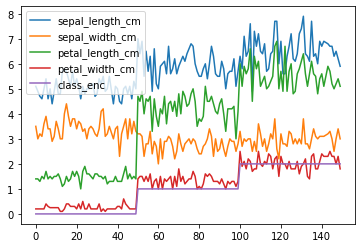

In [172]:
file.plot()

<AxesSubplot:>

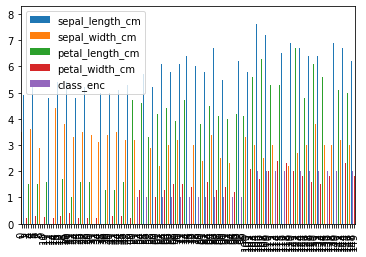

In [173]:
file.plot.bar()

<AxesSubplot:ylabel='Frequency'>

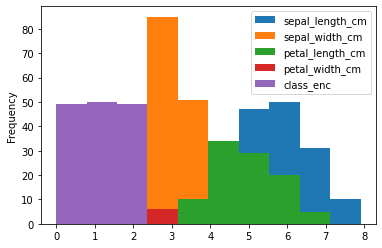

In [174]:
file.plot.hist()

In [183]:
filenew = file.select_dtypes(include=np.number)

<AxesSubplot:>

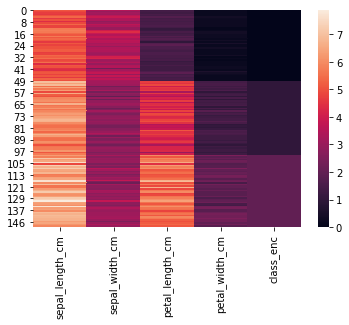

In [184]:
sns.heatmap(filenew)

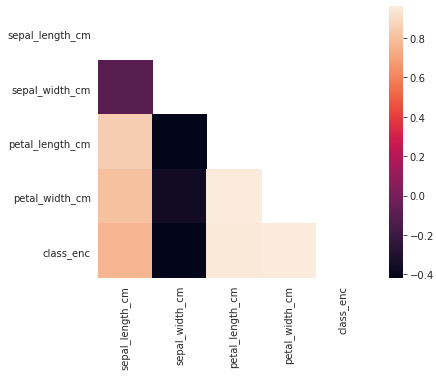

In [186]:
corr=file.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True)

<AxesSubplot:>

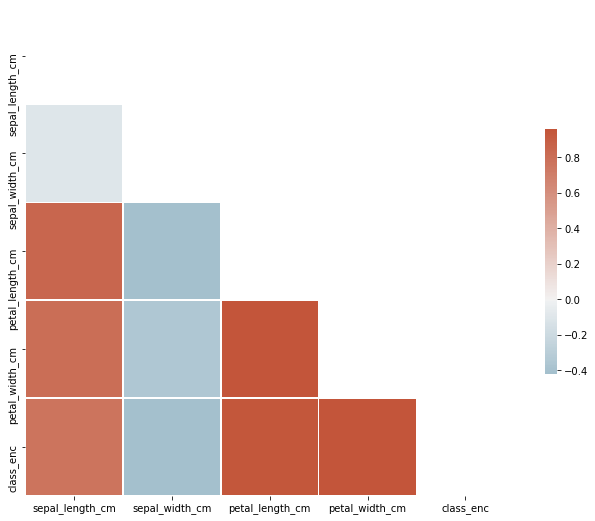

In [187]:
# Compute the correlation matrix
corr=file.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})